In [1]:
import gc
import os
import scanpy as sc
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import anndata as ad

from sctools import plot
from matplotlib.colors import LinearSegmentedColormap
from scanpy.pl.palettes import default_28


cmap = LinearSegmentedColormap.from_list(
    'petrols',
    ['#edf8b1', '#7fcdbb', '#2c7fb8'][::-1],
    255
)
base_dir = '../plots'
    
def compute_raw_umap(adata):
    tmp = adata.copy()
    tmp.layers['counts'] = tmp.X.copy()
    sc.pp.normalize_total(
        tmp, 
        target_sum = 1e4
    )
    sc.pp.log1p(tmp)
    sc.pp.highly_variable_genes(
        tmp,
        n_top_genes = 4000,
        layer = "counts",
        flavor = "seurat_v3",
    )
    sc.pp.pca(
        tmp, 
        n_comps = 40, 
        svd_solver = 'arpack',
        use_highly_variable = True,
    )
    sc.pp.neighbors(
        tmp,
        use_rep = 'X_pca'
    )
    sc.tl.umap(tmp)
    return tmp

Global seed set to 0


## Raw data

In [2]:
data_keys = [
    'tissue.uc',
    'tissue.ad',
    'pbmc.scps'
]
adatas = {
    k: sc.read_h5ad(f'../data/{k}.integrated.clustered.h5ad') for k in data_keys
}
adatas['tissue.scps'] = sc.read_h5ad(f'../data/tissue.scps.integrated.annotated.h5ad')
adatas

{'tissue.uc': AnnData object with n_obs × n_vars = 79378 × 4000
     obs: 'sample_id', 'patient_id', 'status', 'tissue', 'cell_fraction', 'doublet', 'doublet_score', 'nFeature_RNA', 'nCount_RNA', 'percent_mt', 'percent_ribo', 'qc_pass', '_scvi_batch', '_scvi_labels', 'leiden_scvi_0.4', 'coarse_cell_types'
     var: 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
     uns: '_scvi_manager_uuid', '_scvi_uuid', 'hvg', 'leiden', 'neighbors', 'umap'
     obsm: 'X_scvi', 'X_umap'
     layers: 'counts'
     obsp: 'connectivities', 'distances',
 'tissue.ad': AnnData object with n_obs × n_vars = 318976 × 4000
     obs: 'sample_id', 'patient_id', 'status', 'tissue', 'cell_fraction', 'doublet', 'doublet_score', 'nFeature_RNA', 'nCount_RNA', 'percent_mt', 'percent_ribo', 'qc_pass', '_scvi_batch', '_scvi_labels', 'leiden_scvi_0.25', 'coarse_cell_types'
     var: 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
     uns: '_scvi_manage

In [3]:
tmps = {}
for k, adata in adatas.items():
    print(k)
    tmp = compute_raw_umap(adata)
    # plot patient_id to retrieve consistent color palette
    sc.pl.umap(
        tmp, 
        color = 'patient_id',
        show = False
    )
    tmps[k] = tmp

tissue.uc


/users/daniel.malzl/.local/lib/python3.9/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/users/daniel.malzl/.local/lib/python3.9/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/users/daniel.malzl/.local/lib/python3.9/site-packages/umap/distances.py:1086: NumbaDepr

tissue.ad


/users/daniel.malzl/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


pbmc.scps


/users/daniel.malzl/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


tissue.scps


/users/daniel.malzl/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


In [4]:
patient_id_color_palettes = {}
for k, tmp in tmps.items():
    patient_id_color_palettes[k] = {
        k: v for k, v 
        in zip(tmp.obs.patient_id.cat.categories, tmp.uns['patient_id_colors'])
    }
patient_id_color_palettes

{'tissue.uc': {'C9': '#1f77b4',
  'C12': '#ff7f0e',
  'C16': '#279e68',
  'C17': '#d62728',
  'C18': '#aa40fc',
  'C19': '#8c564b',
  'C21': '#e377c2',
  'C30': '#b5bd61',
  'U4': '#17becf',
  'U5': '#aec7e8',
  'U34': '#ffbb78',
  'U35': '#98df8a',
  'U41': '#ff9896',
  'U44': '#c5b0d5',
  'U45': '#c49c94'},
 'tissue.ad': {'E1': '#1f77b4',
  'E2': '#ff7f0e',
  'E3': '#279e68',
  'E4': '#d62728',
  'S4': '#aa40fc',
  'S5': '#8c564b',
  'SSHIV35_1': '#e377c2',
  'SSHIV35_2': '#b5bd61',
  'SSHIV35_4': '#17becf',
  's1': '#aec7e8',
  's2': '#ffbb78',
  's3': '#98df8a'},
 'pbmc.scps': {'P01': '#1f77b4',
  'P02': '#ff7f0e',
  'P03': '#279e68',
  'P05': '#d62728',
  'P06': '#aa40fc',
  'P07': '#8c564b',
  'P08': '#e377c2',
  'P09': '#b5bd61',
  'P10': '#17becf',
  'P11': '#aec7e8',
  'P12': '#ffbb78',
  'P13': '#98df8a',
  'P14': '#ff9896',
  'Pso3': '#c5b0d5',
  'Pso4': '#c49c94',
  'Pso7': '#f7b6d2',
  'Pso8': '#dbdb8d',
  'SSHIV35_1': '#9edae5',
  'SSHIV35_2': '#ad494a',
  'SSHIV35_4': '#

In [5]:
for k, tmp in tmps.items():
    plot_dir = os.path.join(base_dir, k)
    if not os.path.exists(plot_dir):
        os.mkdir(plot_dir)
        
    plot.misc.generate_and_save_for_figure(
        tmp,
        {
            'sample_id': (None, None), 
            'patient_id': (patient_id_color_palettes[k], None),
            'status': ('colorblind', None),
            'CD3D': (cmap, 3)
        },
        f'{plot_dir}/{k}' + '.raw.{0}.png',
        f'{plot_dir}/{k}' + '.raw.{0}.legend.pdf',
        size = 10,
        edgecolor = 'k',
        linewidths = 0.05
    )

/users/daniel.malzl/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/users/daniel.malzl/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/users/daniel.malzl/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/users/daniel.malzl/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/users/daniel.malzl

In [6]:
del tmps, tmp
gc.collect()

77975

## Full, integrated data

In [10]:
leiden_clustering_columns = {
    'tissue.scps': 0.1,
    'tissue.uc': 0.4,
    'tissue.ad': 0.25,
    'pbmc.scps': 0.3
}
for k, adata in adatas.items():
    plot_dir = os.path.join(base_dir, k)
    # ensure logcpm
    adata.X = adata.layers['counts'].copy()
    sc.pp.normalize_total(
        adata,
        target_sum=1e4
    )
    sc.pp.log1p(adata)
    
    leiden_clusters_column = 'leiden_scvi_' + str(leiden_clustering_columns[k])
    columns_to_plot = {
        'sample_id': (None, None),
        'patient_id': (patient_id_color_palettes[k], None),
        'coarse_cell_types': ('colorblind', None),
        leiden_clusters_column: (None, None), 
        'status': ('colorblind', None),
        'CD3D': (cmap, 3)
    }
    
    if 'cell_type' in adata.obs.columns:
        columns_to_plot['cell_type'] = (None, None)
                        
    plot.misc.generate_and_save_for_figure(
        adata,
        columns_to_plot,
        f'{plot_dir}/{k}' + '.integrated.{0}.png',
        f'{plot_dir}/{k}' + '.integrated.{0}.legend.pdf',
        size = 10,
        edgecolor = 'k',
        linewidths = 0.05
    )

/users/daniel.malzl/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/users/daniel.malzl/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/users/daniel.malzl/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/users/daniel.malzl/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/users/daniel.malzl/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' wil

In [11]:
del adatas, adata
gc.collect()

109540

## Tcells raw

In [48]:
adatas = {}
data_keys = [
    'tcells.tissue.scps',
    'tcells.tissue.uc',
    'tcells.tissue.ad',
    'tcells.pbmc.scps'
]
adatas = {
    k: sc.read_h5ad(f'../data/{k}.integrated.clustered.h5ad') for k in data_keys
}
adatas

{'tcells.tissue.scps': AnnData object with n_obs × n_vars = 62432 × 20912
     obs: 'sample_id', 'patient_id', 'status', 'tissue', 'cell_fraction', 'doublet', 'doublet_score', 'nFeature_RNA', 'nCount_RNA', 'percent_mt', 'percent_ribo', 'qc_pass', '_scvi_batch', '_scvi_labels', 'leiden_scvi_0.1', 'coarse_cell_types', 'leiden_scvi_0.4', 't_cell_types'
     uns: '_scvi_manager_uuid', '_scvi_uuid', 'leiden', 'neighbors', 'umap'
     obsm: 'X_scvi', 'X_umap'
     layers: 'counts'
     obsp: 'connectivities', 'distances',
 'tcells.tissue.uc': AnnData object with n_obs × n_vars = 46867 × 18436
     obs: 'sample_id', 'patient_id', 'status', 'tissue', 'cell_fraction', 'doublet', 'doublet_score', 'nFeature_RNA', 'nCount_RNA', 'percent_mt', 'percent_ribo', 'qc_pass', '_scvi_batch', '_scvi_labels', 'leiden_scvi_0.4', 'coarse_cell_types', 'leiden_scvi_1', 't_cell_types'
     uns: '_scvi_manager_uuid', '_scvi_uuid', 'leiden', 'neighbors', 'umap'
     obsm: 'X_scvi', 'X_umap'
     layers: 'counts'
  

In [15]:
tmps = {
    k: compute_raw_umap(adata) for k, adata in adatas.items()
}

In [17]:
base_dir = '../plots'
patient_id_color_palettes = {
    f'tcells.{k}': palette for k, palette in patient_id_color_palettes.items()
}
for k, tmp in tmps.items():
    plot_dir = os.path.join(base_dir, k)
    
    if not os.path.exists(plot_dir):
        os.mkdir(plot_dir)
        
    plot.misc.generate_and_save_for_figure(
        tmp,
        {
            'sample_id': (None, None), 
            'patient_id': (patient_id_color_palettes[k], None),
            'status': ('colorblind', None),
            'FOXP3': (cmap, 1)
        },
        f'{plot_dir}/{k}' + '.raw.{0}.png',
        f'{plot_dir}/{k}' + '.raw.{0}.legend.pdf',
        size = 15,
        edgecolor = 'k',
        linewidths = 0.1
    )

/users/daniel.malzl/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/users/daniel.malzl/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/users/daniel.malzl/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/users/daniel.malzl/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/users/daniel.malzl

In [18]:
del tmp
gc.collect()

18277

## Tcells integrated

In [19]:
leiden_clustering_columns = {
    'tcells.tissue.scps': 0.4,
    'tcells.tissue.uc': 1,
    'tcells.tissue.ad': 0.3,
    'tcells.pbmc.scps': 0.5
}
for k, adata in adatas.items():
    plot_dir = os.path.join(base_dir, k)
    # ensure logcpm
    adata.X = adata.layers['counts'].copy()
    sc.pp.normalize_total(
        adata,
        target_sum=1e4
    )
    sc.pp.log1p(adata)
    
    leiden_clusters_column = 'leiden_scvi_' + str(leiden_clustering_columns[k])
    columns_to_plot = {
        'sample_id': (None, None),
        'patient_id': (patient_id_color_palettes[k], None),
        't_cell_types': ('colorblind', None),
        leiden_clusters_column: (None, None), 
        'status': ('colorblind', None),
        'CD3D': (cmap, 3),
        'FOXP3': (cmap, 2),
        'IKZF2': (cmap, 2),
        'IL2RA': (cmap, 2),
        'SAT1': (cmap, 20),
    }
    
    if 'cell_type' in adata.obs.columns:
        columns_to_plot['cell_type'] = (None, None)
                        
    plot.misc.generate_and_save_for_figure(
        adata,
        columns_to_plot,
        f'{plot_dir}/{k}' + '.integrated.{0}.png',
        f'{plot_dir}/{k}' + '.integrated.{0}.legend.pdf',
        size = 15,
        edgecolor = 'k',
        linewidths = 0.1
    )

/users/daniel.malzl/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/users/daniel.malzl/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/users/daniel.malzl/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/users/daniel.malzl/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/users/daniel.malzl/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' wil

## Tregs vs other T-cell dotplots

In [57]:
polyamine_genes = ['SAT1', 'ODC1', 'SMS', 'SRM', 'ARG2']
control_condition = {
    'tcells.tissue.scps': 'normal',
    'tcells.tissue.uc': 'control',
    'tcells.tissue.ad': 'normal',
    'tcells.pbmc.scps': 'normal'
}
for k, adata in adatas.items():
    fig, ax = plt.subplots()
    sc.pl.dotplot(
        adata,
        groupby = 't_cell_types',
        var_names = polyamine_genes,
        ax = ax,
        expression_cutoff = 0.1,
        show = False, 
        vmin = 0,
        vmax = 4,
        cmap = cmap
    )

    fig.set_figwidth(7)
    fig.set_figheight(3)
    fig.tight_layout()
    fig.savefig(f'../plots/dotplots/{k}.polyamine.pdf')

/users/daniel.malzl/.local/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)
/users/daniel.malzl/.local/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)
/users/daniel.malzl/.local/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)
/users/daniel.malzl/.local/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


In [50]:
treg_subsets, other_tcell_subsets = [], []
for k, adata in adatas.items():
    treg_subsets.append(
        adata[adata.obs.t_cell_types == 'Treg'].copy()
    )
    other_tcell_subsets.append(
        adata[adata.obs.t_cell_types != 'Treg'].copy()
    )

tregs = ad.concat(treg_subsets)
other_tcells = ad.concat(other_tcell_subsets)

del treg_subsets, other_tcell_subsets
gc.collect()

/users/daniel.malzl/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1906: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/users/daniel.malzl/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1906: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/users/daniel.malzl/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1906: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/users/daniel.malzl/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1906: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


123639

In [59]:
def remap_status(status):
    new_status = []
    for stat in status:
        if stat == 'control':
            stat = 'healthy colon'
        
        if stat == 'normal':
            stat = 'healthy skin'
        
        new_status.append(stat)
    
    return new_status


for k, bdata in zip(['tregs', 'othert'], [tregs, other_tcells]):
    bdata.obs.loc[:, 'status'] = remap_status(bdata.obs.status.to_list())
    
    fig, ax = plt.subplots()
    sc.pl.dotplot(
        bdata,
        groupby = 'status',
        var_names = polyamine_genes,
        ax = ax,
        expression_cutoff = 0.1,
        show = False, 
        vmin = 0,
        vmax = 5,
        cmap = cmap
    )

    fig.set_figwidth(7)
    fig.set_figheight(3)
    fig.tight_layout()
    fig.savefig(f'../plots/dotplots/tcells.tissue.scps.{k}.polyamine.status.pdf')

/tmp/ipykernel_27825/4272725009.py:16: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  bdata.obs.loc[:, 'status'] = remap_status(bdata.obs.status.to_list())
/users/daniel.malzl/.local/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)
/tmp/ipykernel_27825/4272725009.py:16: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  bdata.obs.loc[:, 'status'] = remap_status(bdata.obs.status.to_list())
/users/daniel.malzl

In [60]:
del adatas, adata, bdata
gc.collect()

10254

## Tregs raw

In [63]:
adata = sc.read_h5ad('../data/tregs.tissue.scps.integrated.annotated.h5ad')

In [47]:
k = 'tregs.tissue.scps'
tmp = compute_raw_umap(adata)
plot_dir = os.path.join(base_dir, k)
if not os.path.exists(plot_dir):
    os.mkdir(plot_dir)

plot.misc.generate_and_save_for_figure(
    tmp,
    {
        'sample_id': (None, None), 
        'patient_id': (patient_id_color_palettes['tcells.tissue.scps'], None),
        'status': ('colorblind', None),
        'FOXP3': (cmap, 3),
        'SAT1': (cmap, 5),
        'RORC': (cmap, 1)
    },
    f'{plot_dir}/{k}' + '.raw.{0}.png',
    f'{plot_dir}/{k}' + '.raw.{0}.legend.pdf',
    size = 30,
    edgecolor = 'k',
    linewidths = 0.25
)

/users/daniel.malzl/.local/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:64: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(
/users/daniel.malzl/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/users/daniel.malzl/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/users/daniel.malzl/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with

In [61]:
del tmp
gc.collect()

739

## Tregs integrated

In [65]:
k = 'tregs.tissue.scps'
plot_dir = os.path.join(base_dir, k)
# ensure logcpm
adata.X = adata.layers['counts'].copy()
sc.pp.normalize_total(
    adata,
    target_sum=1e4
)
sc.pp.log1p(adata)
columns_to_plot = {
    'sample_id': (None, None),
    'patient_id': (patient_id_color_palettes['tcells.tissue.scps'], None),
    'sat1_status_majority_vote': ('colorblind', None),
    'status': ('colorblind', None),
    'FOXP3': (cmap, 3),
    'SAT1': (cmap, 15),
    'RORC': (cmap, 1)
}

plot.misc.generate_and_save_for_figure(
    adata,
    columns_to_plot,
    f'{plot_dir}/{k}' + '.integrated.{0}.png',
    f'{plot_dir}/{k}' + '.integrated.{0}.legend.pdf',
    size = 75,
    edgecolor = 'k',
    linewidths = 0.3
)

/users/daniel.malzl/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/users/daniel.malzl/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/users/daniel.malzl/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/users/daniel.malzl/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with lab

## DEG heatmaps

In [2]:
adatas = {}
data_keys = [
    'tcells.tissue.scps',
    'tcells.tissue.uc'
]
control_conditions = {
    'tcells.tissue.scps': 'normal',
    'tcells.tissue.uc': 'control'
}
for k in data_keys:
    adata = sc.read_h5ad(f'../data/{k}.integrated.clustered.h5ad')
    adata = adata[adata.obs.t_cell_types == 'Treg'].copy()
    adata.obs['condition'] = adata.obs.status.apply(
        lambda x: 'healthy' if x == control_conditions[k] else 'disease'
    )
    adatas[k] = adata

adatas

{'tcells.tissue.scps': AnnData object with n_obs × n_vars = 9781 × 20912
     obs: 'sample_id', 'patient_id', 'status', 'tissue', 'cell_fraction', 'doublet', 'doublet_score', 'nFeature_RNA', 'nCount_RNA', 'percent_mt', 'percent_ribo', 'qc_pass', '_scvi_batch', '_scvi_labels', 'leiden_scvi_0.1', 'coarse_cell_types', 'leiden_scvi_0.4', 't_cell_types', 'condition'
     uns: '_scvi_manager_uuid', '_scvi_uuid', 'leiden', 'neighbors', 'umap'
     obsm: 'X_scvi', 'X_umap'
     layers: 'counts'
     obsp: 'connectivities', 'distances',
 'tcells.tissue.uc': AnnData object with n_obs × n_vars = 6272 × 18436
     obs: 'sample_id', 'patient_id', 'status', 'tissue', 'cell_fraction', 'doublet', 'doublet_score', 'nFeature_RNA', 'nCount_RNA', 'percent_mt', 'percent_ribo', 'qc_pass', '_scvi_batch', '_scvi_labels', 'leiden_scvi_0.4', 'coarse_cell_types', 'leiden_scvi_1', 't_cell_types', 'condition'
     uns: '_scvi_manager_uuid', '_scvi_uuid', 'leiden', 'neighbors', 'umap'
     obsm: 'X_scvi', 'X_umap'


In [3]:
df = pd.read_csv(
    '../resource/DEGs_grouped_updated.txt', 
    sep = '\t'
)
df

,Gene,Group,Tissue,regulation
0,JUND,AP1_family,skin,up
1,FOS,AP1_family,skin,up
2,JUNB,AP1_family,skin,up
3,JUN,AP1_family,skin,up
4,FOSL2,AP1_family,skin,up
...,...,...,...,...
111,MAGEH1,Cellcycle_Proliferation_Apoptosis,colon,up
112,PTMS,Cellcycle_Proliferation_Apoptosis,colon,up
113,DNPH1,Cellcycle_Proliferation_Apoptosis,colon,up
114,DUSP2,MAPK_signalling,colon,up


In [4]:
degs = {}
for k, tissue in zip(data_keys, ['skin', 'colon']):
    deg_df = df.loc[df.Tissue == tissue, :]
    deg_df.set_index(
        'Gene',
        inplace = True
    )
    degs[k] = deg_df
    
degs

{'tcells.tissue.scps':                           Group Tissue regulation
 Gene                                             
 JUND                 AP1_family   skin         up
 FOS                  AP1_family   skin         up
 JUNB                 AP1_family   skin         up
 JUN                  AP1_family   skin         up
 FOSL2                AP1_family   skin         up
 ...                         ...    ...        ...
 LY6E    Tcell_costim_activation   skin       down
 CD96    Tcell_costim_activation   skin       down
 HLA-A   Tcell_costim_activation   skin       down
 LGALS1  Tcell_costim_activation   skin       down
 CD247   Tcell_costim_activation   skin       down
 
 [97 rows x 3 columns],
 'tcells.tissue.uc':                                       Group Tissue regulation
 Gene                                                         
 TNFRSF4             Tcell_costim_activation  colon         up
 TNFRSF18            Tcell_costim_activation  colon         up
 CD7             

In [5]:
palette = sns.color_palette('Set2', len(df.Group.unique()))
gene_group_palette = {
    k: palette[i] for i, k in enumerate(df.Group.unique())
}

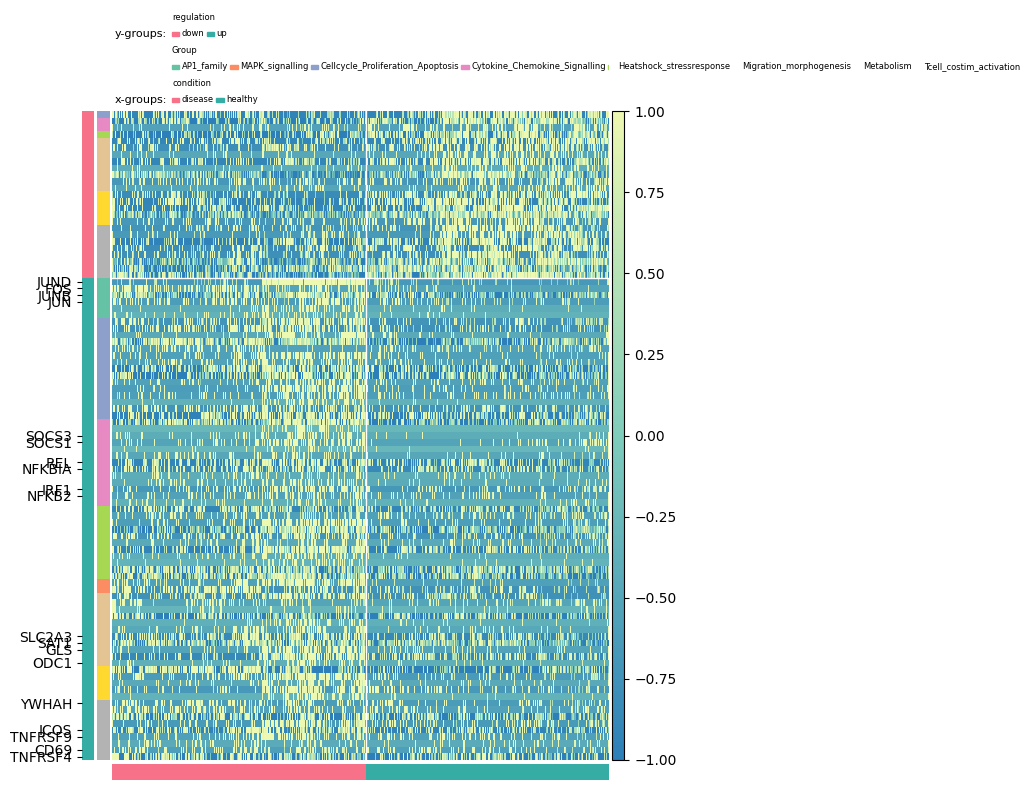

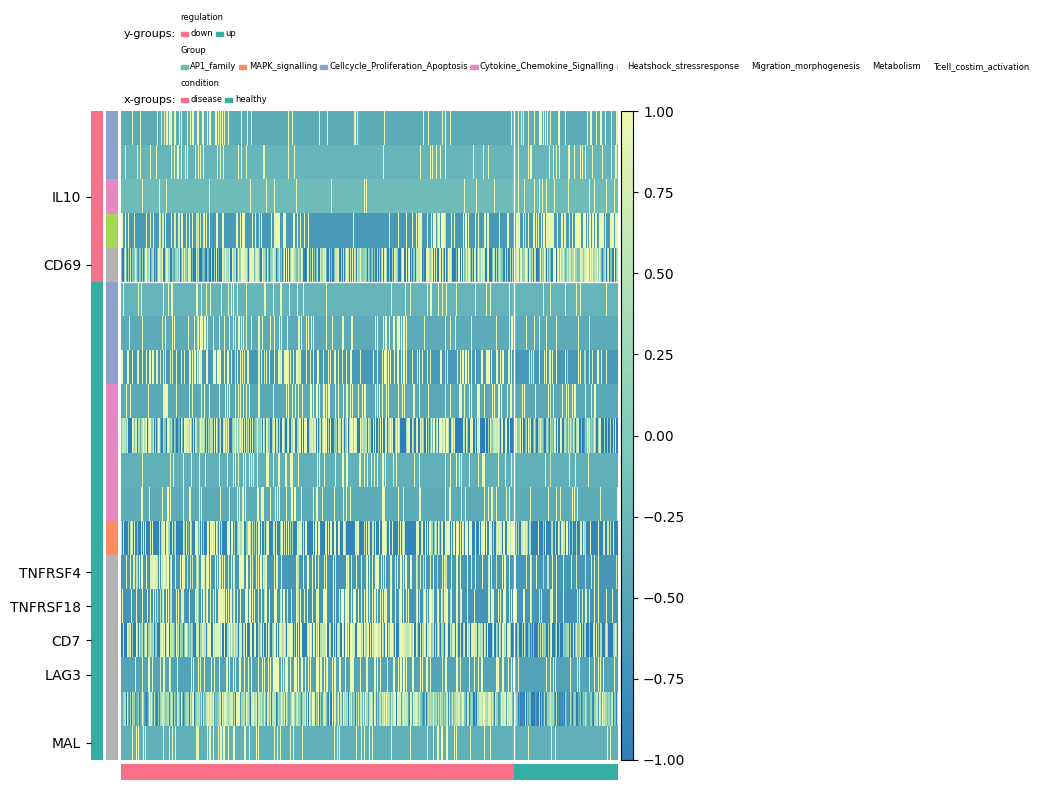

In [11]:
labels_to_show = {
    'tcells.tissue.scps': [
        'TNFRSF4', 'CD69', 'TNFRSF9', 'ICOS', 
        'YWHAH', 'ODC1', 'GLS', 'SAT1', 'SLC2A3', 
        'NFKB2', 'IRF1', 'NFKBIA', 'REL', 'SOCS1', 
        'SOCS3', 'JUN', 'JUNB', 'FOS', 'JUND'
    ],
    'tcells.tissue.uc': [
        'MAL', 'LAG3', 'CD7', 'TNFRSF18', 
        'TNFRSF4', 'CD69', 'IL10'
    ]
}

for k, adata in adatas.items():
    deg_df = degs[k]
    adata.X = adata.layers['counts'].copy()
    sc.pp.normalize_total(adata, target_sum = 1e4)
    sc.pp.log1p(adata)
    sc.pp.scale(adata)
    
    bdata = adata[:, deg_df.index]
    bdata.var = bdata.var.merge(
        deg_df,
        how = 'left',
        left_index = True,
        right_index = True
    )

    fig, axs, x_group_info, y_group_info = plot.evaluate.grouped_heatmap(
        bdata,
        ['condition'],
        ['regulation', 'Group'],
        {'condition': 'husl'},
        {'regulation': 'husl', 'Group': gene_group_palette},
        cmap,
        vmin = -1,
        vmax = 1,
        show_var_labels = True,
        var_labels_to_show = labels_to_show[k],
        figwidth = 7,
        figheight = 10
    )
    fig.savefig(
        f'../plots/{k}.deg.heatmap.pdf'
    )

## Differential abundance

In [2]:
data_keys = [
    'tcells.tissue.scps',
    'tcells.tissue.uc',
    'tcells.tissue.ad',
    'tcells.pbmc.scps',
    'tregs.tissue.scps'
]
adatas = {
    k: sc.read_h5ad(f'../data/{k}.integrated.milo.h5ad') for k in data_keys
}
adatas

{'tcells.tissue.scps': AnnData object with n_obs × n_vars = 62432 × 20912
     obs: 'sample_id', 'patient_id', 'status', 'tissue', 'cell_fraction', 'doublet', 'doublet_score', 'nFeature_RNA', 'nCount_RNA', 'percent_mt', 'percent_ribo', 'qc_pass', '_scvi_batch', '_scvi_labels', 'leiden_scvi_0.1', 'coarse_cell_types', 'condition', 'nhood_ixs_random', 'nhood_ixs_refined', 'nhood_kth_distance'
     uns: '_scvi_manager_uuid', '_scvi_uuid', 'neighbors', 'nhood_adata', 'umap'
     obsm: 'X_scvi', 'X_umap', 'nhoods'
     layers: 'counts'
     obsp: 'connectivities', 'distances',
 'tcells.tissue.uc': AnnData object with n_obs × n_vars = 46867 × 18436
     obs: 'sample_id', 'patient_id', 'status', 'tissue', 'cell_fraction', 'doublet', 'doublet_score', 'nFeature_RNA', 'nCount_RNA', 'percent_mt', 'percent_ribo', 'qc_pass', '_scvi_batch', '_scvi_labels', 'leiden_scvi_0.4', 'coarse_cell_types', 'condition', 'nhood_ixs_random', 'nhood_ixs_refined', 'nhood_kth_distance'
     uns: '_scvi_manager_uuid',

In [3]:
os.environ['R_HOME'] = '/users/daniel.malzl/.conda/envs/scpython/lib/R'
os.environ['TZ'] = 'Europe/Vienna' # needs to be set in some cases to avoid tzlocal error

In [6]:
import milopy

min_sizes = {
    'tcells.tissue.scps': 5,
    'tcells.tissue.uc': 5,
    'tcells.tissue.ad': 5,
    'tcells.pbmc.scps': 5,
    'tregs.tissue.scps': 20
}
for k, adata in adatas.items():
    fig, ax = plt.subplots()
    milopy.plot.plot_nhood_graph(
        adata, 
        alpha = 0.25, 
        min_size = min_sizes[k], 
        ax = ax, 
        show = False,
        edgecolor = 'k',
        linewidths = 0.5
    )
    fig.set_figwidth(5.5)
    fig.set_figheight(5)
    fig.tight_layout()
    fig.savefig(f'../plots/{k}.milo.DA.pdf')
    
    fig, ax = plt.subplots()
    plot.evaluate.plot_nhood_violin(
        adata,
        0.25,
        ax = ax
    )
    fig.set_figwidth(6)
    fig.set_figheight(5)
    fig.tight_layout()
    fig.savefig(f'../plots/{k}.milo.violin.pdf')

/users/daniel.malzl/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1301: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/groups/pavri/bioinfo/daniel/Neuwirth_Malzl_et_al_2024/notebooks/sctools/plot/evaluate.py:94: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(
/users/daniel.malzl/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1301: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/groups/pavri/bioinfo/daniel/Neuwirth_Malzl_et_al_2024/notebooks/sctools/plot/evaluate.py:94: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(
/users/daniel.malzl/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1301: ImplicitModificationWarn